# Final project: Portfolio Optimization using Monte Carlo methods.

## Introduction

Portfolio optimization is a fundamental tool in financial decision\-making, aiming to establish an optimal asset allocation strategy. This report aimed to replicate the process of making a Monte\-Carlo simulation of possible portfolio behavior and constructing an Efficient Frontier, by following the guidance from the QuantPy youtube channel. The goal of this paper is to provide investors with detailed information on the inherent risks and returns associated with diverse asset allocations.

Various mathematical methods were used for calculating the asset distribution. It involved calculating mean returns and covariance matrix of stocks based on historical data, optimizing the variance and Sharpe ratio, which compares the return on investment with its risk, and creating the heat map to visualize the efficient frontier to choose the optimal allocation of assets in a portfolio. 

The main goal is to show how the integration of Monte Carlo methods, standard distribution analysis, minimization techniques, and heat maps can be strategically employed to optimize asset allocation within a portfolio. This report outlines the methodologies used to address this question and presents key findings derived from the simulations, giving specific information on portfolio returns with the combination of highest returns and minimum risks.



## Methods

In this research, the following libraries and built-in modules were used to analyse the data:

1. **NumPy**  is employed for numerical computations, array manipulations, and mathematical operations like creating arrays and for calculations associated with normal distribution.
2. **Matplotlib** is used to generate various plots and visualizations. In the report it was used to plot the Monte\-Carlo simulations of different portfolio outcomes and the heat map visualizing the efficient frontier.
3. **SciPy** is used for scientific and technical computing in Python. The scipy optimization command \(sc.optimize.minimize\) was used to obtain the minimum values for the variance and maximum values for returns.
4. **yfinance** is a Python library that provides a convenient interface for accessing financial data from Yahoo Finance, was used to download various stock prices for this research.
5. **Datetime** is a built\-in datetime module in Python is essential for working with dates and times, was used to specify the dataframe from which financial data needed to be analysed.
6. **Pandas** is a library designed for data manipulation and analysis, It was used to effectively manage the financial time series data from Yahoo Finance.



The yfinance library needs to be downloaded first before using it, it can be done by using the code below without the hashtag \[1\].


In [1]:
#pip install yfinance

In [2]:
# Import all relevant libraries and modules
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

#### Extracting data

The get\_data function fetches historical closing prices for a diverse set of stocks by using the yfinance library. The selected pick of Australian stocks include a global resources company, major telecommunication provider and one of the leading banks in Australia. The data retrieval spans from December 1, 2015, to December 1, 2023.

After obtaining the closing prices, daily returns are calculated by computing the percentage change in prices. To ensure accuracy, any missing values in the return data are dropped.

Mean returns and the covariance matrix are then calculated inside the function. Mean returns represent the daily average mean return of each stock over the specified period. The covariance matrix quantifies how the returns of different stocks relate to each other, providing information on the diversification potential of combining these assets in a portfolio. Positive covariance signifies correlated movements, while negative covariance implies an inverse relationship. 

These metrics are crucial for portfolio optimization, aiding in the determination of optimal asset allocations that maximize returns while minimizing risk. Combining assets with low or negatively correlated returns is essential for effective diversification, mitigating overall portfolio risk. These factors are the underlying basis of the portfolio optimization analysis \[2\].



In [3]:
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start=start, end=end)['Close']  # Fetch 'Close' data (closing prices) for the given stocks
    returns = stock_data.pct_change().dropna()  # Calculate returns and drop missing values. Used ChatGPT to fix the error with the code
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return mean_returns, cov_matrix

stock_list = ['BHP', 'CBA', 'TLS']
# List of other possible stocks: 'AAPL', 'GOOGL', 'META', 'GOOG', 'TSLA', 'UNH', 'LLY', 'JPM', 'V', 'AVGO', 'XOM', 'JNJ', 'PG', 'MA', 'HD', 'ADBE', 'COST''ETH-USD'
#Crypto: 'BTC-USD', 'ETH-USD'

startDate = dt.datetime(year=2015, month=12, day=1)
endDate = dt.datetime(year=2023, month=12, day=1)

meanReturns, covMatrix = get_data(' '.join(stock_list), startDate, endDate) # ' '.join(stock_list) joins the elements of the stock_list into a single string separated by a space


[                       0%%                      ]

[**********************67%%******                ]  2 of 3 completed

[*********************100%%**********************]  3 of 3 completed

#### Monte Carlo Simulation of Stock Portfolios

The Monte Carlo simulation for 100 stock portfolios was created with the code below. Initially, random weights are assigned to each stock in the portfolio, ensuring that these weights sum up to 1. The simulation parameters, such as the number of simulations \(mc\_sims\) and the timeframe in days \(T\) for the simulation are set.

A matrix \(meanM\) is then initialized to store mean returns for each stock over the specified timeframe. This matrix is transposed for the ease of further calculations. Subsequently, an array \(portfolio\_sims\) is created to store simulated portfolio values for each iteration of the Monte Carlo simulation.

The simulation involves a loop over the specified number of simulations \(mc\_sims\). Within each iteration, random values are generated using a normal distribution, and the Cholesky decomposition is applied to the covariance matrix.  The cumulative product of these returns is then computed, representing the compounding effect over time. The simulated portfolio values are stored in the portfolio\_sims array.

Cholesky decomposition is employed to factorize the covariance matrix into a lower triangular matrix and its transpose. This decomposition aids in generating correlated random variables from independent normal random variables. In the context of portfolio simulations, it allows the incorporation of random variability into the mean returns while respecting the underlying correlations between assets. This method is widely used in quantitative finance for predicting stock values.

It is assumed that the stock returns follow a normal distribution. While this assumption may not perfectly capture the complexities of real market behavior, it provides a convenient and widely adopted framework. It aligns with the central limit theorem, suggesting that the distribution of returns of a large number of independent and identically distributed random variables tends to converge to a normal distribution. 

Finally, a plot is generated to visualize the simulated portfolio values over time, with the y\-axis representing the portfolio value in dollars, the x\-axis denoting the number of days for which projection is made. 



In [4]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
#Monte Carlo method

mc_sims = 100 #Number of simulations
T = 365 #timeframe in days

meanM = np.full(shape = (T, len(weights)), fill_value = meanReturns) # Initializes 2D array with dimensions (T, len(weights) and fills it with mean returns)
meanM = meanM.T # Transposes matrix, so it will be in the form (len(weights), T)

portfolio_sims = np.full(shape = (T, mc_sims), fill_value = 0.0)

initialPortfolio = 10000 # size of Portfolio in dollars

def plot_monte_carlo_simulations(initialPortfolio, mc_sims, weights, meanM, covMatrix): #MC loops
    for i in range(mc_sims):
        Z = np.random.normal(size = (T, len(weights))) # Assumption is made that we use the normal distribution, however in reality it may not be perfect (may involve fat tails, skewness, and kurtosis)
        L = np.linalg.cholesky(covMatrix) # Decomposes the covariance matrix into lower triangular matrix. It adds the random element while accounting for normal distibution.
        dailyReturns = meanM + np.inner(L, Z) # Adds random variability to the mean
        portfolio_sims[:,i] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialPortfolio # the cumprod simulates the compounding effect over time. The reason for adding 1 is to model returns as multiplier.

    plt.plot(portfolio_sims)
    plt.ylabel('Portfolio Value ($)')
    plt.xlabel('Days')
    plt.title('MC simulation of stocks portfolio')
    plt.show()

#### Calculating Sharpe Ratio for highest returns

The PortfolioPerformance function calculates the returns and standard deviation of a portfolio based on random weights, mean returns, and the covariance matrix of asset returns over the chosen history period. The returns are determined by multiplying the mean returns of assets by their respective weights and scaling the result by the number of trading days in a year \(252\). The standard deviation is computed using the portfolio weights and covariance matrix, and then annualized.

After initializing the weights, meanReturns, and covMatrix, the code proceeds to compute the annualized returns and standard deviation of the portfolio using the PortfolioPerformance function.

The negativeSR function computes the negative Sharpe Ratio, crucial for subsequent optimization. Computed as the ratio of the difference between portfolio returns and the risk\-free rate to the portfolio standard deviation, the Sharpe Ratio measures the risk\-adjusted performance of an investment. The inclusion of the risk\-free rate accounts for the opportunity cost of not investing in a risk\-free asset, like government bonds.  The negative sign is used because the optimization function aims to minimize, and minimizing the negative Sharpe Ratio is equivalent to maximizing the Sharpe Ratio. 

The maxSR function performs portfolio optimization to maximize the Sharpe Ratio. It takes mean returns, covariance matrix, an optional risk\-free rate, and a constraint set for portfolio weights as parameters. The scipy optimization function \(sc.optimize.minimize\) is employed to find the portfolio weights that maximize the Sharpe Ratio while satisfying the constraint of the weights summing to 1 \[3\].

Finally, the code calls the maxSR function with mean returns and covariance matrix to find the optimized weights and maximum Sharpe Ratio. It then prints the maximum Sharpe Ratio and the corresponding optimized weights. 


In [5]:
def PortfolioPerformance(weights, meanReturns, covMatrix):
    returns = np.sum(meanReturns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights))) * np.sqrt(252)
    return returns, std

weights = np.array(weights)
meanReturns = np.array(meanReturns)

returns, std = PortfolioPerformance(weights, meanReturns, covMatrix)

def negativeSR(weights, meanReturn, covMatrix, riskFreeRate = 0): # using negative Sharpe Ratio to utilize the scipy minimization function. Minimizing negative SR = Maximizing positive SR
    pReturns, pStd = PortfolioPerformance(weights, meanReturns, covMatrix)
    return - (pReturns - riskFreeRate) / pStd # the formula for Sharpe Ratio


def maxSR(meanReturns, covMatrix, riskFreeRate = 0, constraintSet = (0, 1)):
    # Minimize the negative SR, by altering weights of portfolio
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, riskFreeRate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # first part of dictionary specifies the type of constrain, equality constraint 'eq' should be equal to zero for the solution to satisfy the constraint.
    # This part of dictionary represents the constraint, which should be equal to 1
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = sc.optimize.minimize(negativeSR, numAssets*[1./numAssets], args = args, # First guess is equal distribution of assets in the Portfolio
                         method = 'SLSQP', bounds = bounds, constraints = constraints)
    return result

result = maxSR(meanReturns, covMatrix)
maxSR_result, maxWeights = result['fun'], result['x']
print('Maximum Sharpe Ratio:', maxSR_result, '\n')
print('Weights Distribution for the highest returns:', '\n', maxWeights)

Maximum Sharpe Ratio: -0.69349045354122 

Weights Distribution for the highest returns: 
 [0.76373607 0.23626393 0.        ]


#### Finding portfolio allocation for minimum volatility

PortfolioVariance function utilizes the PortfolioPerformance function to calculate the portfolio's returns and standard deviation, extracting and returning only the standard deviation, which represents the portfolio variance.

The MinimizeVariance function aims to minimize the portfolio variance by adjusting the allocation of assets in the portfolio. It takes mean returns, covariance matrix, an optional risk\-free rate \(typically represents the returns on investing in bonds or putting money in the bank\) , and a constraint set for portfolio weights as parameters.  The scipy optimization function \(sc.optimize.minimize\) is then employed to determine the portfolio weights that minimize the variance while adhering to the constraint of the weights summing to 1. This function basically mimics the maxR

The concluding part of the code calls the MinimizeVariance function with mean returns and covariance matrix to find the optimized weights and minimum variance. 



In [6]:
def PortfolioVariance(weights, meanReturns, covMatrix):
    return PortfolioPerformance(weights, meanReturns, covMatrix)[1]

def MinimizeVariance(meanReturns, covMatrix, riskFreeRate = 0, constraintSet = (0,1)):
    'Minimize the portfolio variance by alering the weights/allocation of assets in the portfolio'
    args = (meanReturns, covMatrix, riskFreeRate)
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # first part of dictionary specifies the type of constrain, equality constraint 'eq' should be equal to zero for the solution to satisfy the constraint.
    # Second part of dictionary represents the constraint, which should be equal to 1
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = sc.optimize.minimize(PortfolioVariance, numAssets*[1./numAssets], args = args, # First guess is equal distribution of assets in the Portfolio
                         method = 'SLSQP', bounds = bounds, constraints = constraints)
    return result
minVarResult = MinimizeVariance(meanReturns, covMatrix)
minVar, minVarWeights = minVarResult['fun'], minVarResult['x']

#### Defining the function to plot the efficient frontier

The plot\_efficient\_frontier function employs Monte Carlo simulation  to generate a specified number \(num\_portfolios\) of random portfolios, each characterized by different asset allocations. For each portfolio, the Sharpe ratio, returns and standard deviation \(volatility\) of the portfolio over the given time period are computed. The portfolios are then plotted on a scatter plot, where the x\-axis represents volatility, the y\-axis represents returns in percentages, and the color of each point indicates the magnitude of Sharpe ratio.

Additionally, the function identifies the portfolio associated with the maximum Sharpe ratio, indicative of an optimal risk\-return trade\-off.  This portfolio is highlighted on the plot with a distinctive red star. The code further displays key information, including the volatility and annual returns of the optimized portfolio, and presents the preferred asset allocation in terms of weights assigned to individual stocks.

This analysis aids investors in visualizing and understanding the trade\-offs between risk and return for various portfolio compositions, assisting in the decision\-making process when constructing an investment portfolio. The utilization of Monte Carlo simulations and the efficient frontier concept enhances the robustness and comprehensiveness of the financial analysis \[4\].


In [7]:
maxSR_result = maxSR(meanReturns, covMatrix)
maxSR_return, maxSR_std = PortfolioPerformance(maxSR_result['x'], meanReturns, covMatrix)

In [8]:
num_portfolios = 15000
risk_free_rate = 0
results = np.zeros((3, num_portfolios))

def plot_efficient_frontier(num_portfolios, meanReturns, covMatrix, risk_free_rate=0):
    results = np.zeros((3, num_portfolios))
    # MC simulation
    for i in range(num_portfolios):
        weights = np.random.random(len(meanReturns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std = PortfolioPerformance(weights, meanReturns, covMatrix)
        results[0, i] = portfolio_return * 100
        results[1, i] = portfolio_std * 100
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std

    # Find the maximum Sharpe ratio portfolio
    maxSR_return, maxSR_std = PortfolioPerformance(maxSR_result['x'], meanReturns, covMatrix)

    # Plot the efficient frontier
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(maxSR_std * 100, maxSR_return * 100, marker='*', color='r', s=500, label='Max Sharpe Ratio Portfolio')
    plt.title('Efficient Frontier with Maximum Sharpe Ratio Portfolio')
    plt.xlabel('Volatility over given period (%)')
    plt.ylabel('Returns over given period (%)')
    plt.legend()
    plt.show()
    print('Volatility for optimized portfolio =', round(maxSR_std * 100, 2),'%')
    print('Returns for optimized portfolio for the optimized portfolio =', round(maxSR_return * 100,2),'%')
    print('Preferrable asset allocation, in %:')
    for i in range(len(stock_list)):
        print(stock_list[i], round(maxSR_result['x'][i] * 100, 4))

# Results

## Calculating Mean returns and covariance matrix

The following output displays the mean returns of the selected stocks and their corresponding covariance matrix, providing important information about returns and relationships among the chosen assets.

**Mean Returns** of the selected stocks are as follows:

- BHP: 0.00056526
- CBA: 0.00275466
- TLS: -0.0002634

These values represent the average returns of each stock over the specified historical period. 

**Covariance Matrix:**
The covariance matrix illustrates the statistical relationships between pairs of stocks. A covariance matrix reflects how different stocks move in relation to each other. The matrix is symmetric, with the diagonal elements representing the variance of each stock, and off\-diagonal elements representing the covariances. A positive covariance suggests that the stocks tend to move in the same direction, while a negative covariance indicates an inverse relationship. The covariance matrix informs investors about the interdependencies between stocks, helping them to manage risk effectively.

The distinct correlation pattern in the context of these 3 stocks can be observed. It can be seen that CBA has a negative correlation with the other 2 stocks, while BHP and TLS have a positive correlation. It means that the prices of BHP and TLS stock prices tend to have shared responses to economic events and follow similar growth trends. These correlations arise from factors such as industry influence, company\-specific dynamics, and investor behavior.


In [9]:
print('Mean Returns of Stocks')
print(meanReturns)
print('Covariance Matrix')
print(covMatrix)

Mean Returns of Stocks
[ 0.00056526  0.00275466 -0.0002634 ]
Covariance Matrix
          BHP       CBA       TLS
BHP  0.000466 -0.000149  0.000187
CBA -0.000149  0.007095  0.000095
TLS  0.000187  0.000095  0.003058


# Plotting possible portfolio variations using Monte\-Carlo method

The Monte Carlo simulation aimed to explore diverse outcomes for a portfolio over a 365\-day period by incorporating random variability in stock returns. Random weights were assigned to represent various asset allocations, and the simulation iterated 100 times to capture a range of potential scenarios. The resulting graph depicted the simulated portfolio values over time for each iteration, showing the potential behavior of the portfolio under different market conditions. 

The variations in portfolio outcomes depicted in the graph arise from the utilization of random weights and the Cholesky decomposition of the covariance matrix in the Monte Carlo simulation. The random weights introduce diversity in asset allocations, contributing to the different trajectories of simulated portfolios. The Cholesky decomposition maintains the correlation structure among stocks while adding a random element, influencing the overall behavior of the portfolio. The outcomes are influenced by the assumption of a normal distribution in generating random returns. This assumption, though widely used, might oversimplify the true distribution of financial returns, potentially leading to a somewhat idealized representation of portfolio behavior. Consequently, the observed differences in outcomes underscore the sensitivity of the portfolio to variations in market conditions and the inherent uncertainties associated with modeling financial assets based on a normal distribution.

It's crucial to recognize that the assumptions inherent in the simulation. Therefore, while the graph serves as a valuable tool for risk assessment and decision\-making, investors should interpret it with an awareness of these simplifying assumptions. 



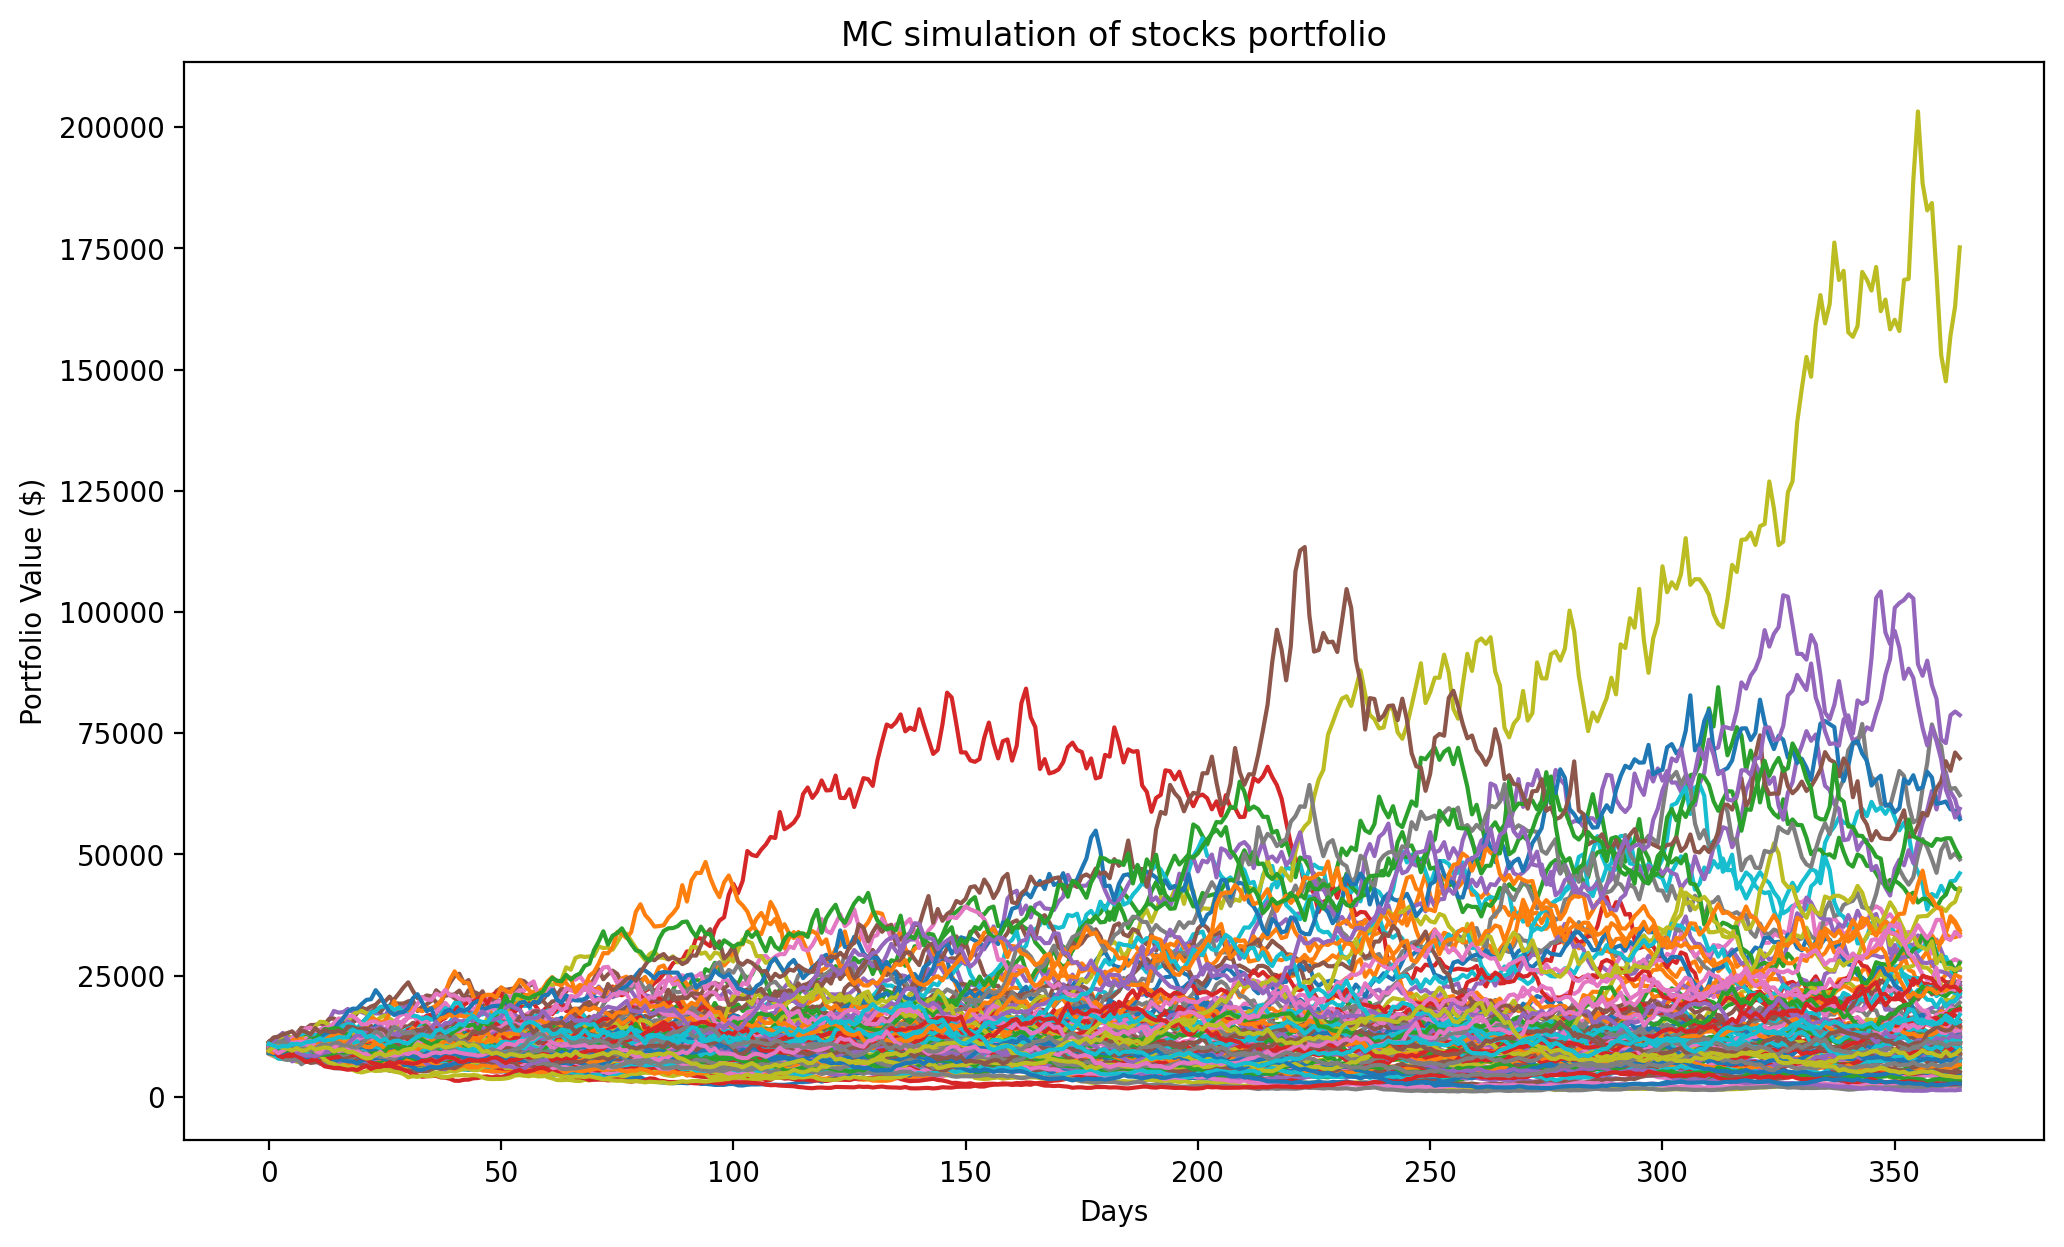

In [10]:
plot_monte_carlo_simulations(initialPortfolio, mc_sims, weights, meanM, covMatrix)

## Finding distribution for highest returns

The output represents the results of maximizing the Sharpe Ratio for the given portfolio. The Maximum Sharpe Ratio is a measure of the risk\-adjusted return, and in this specific case, it is calculated as \-0.6935. The negative sign is expected, as the optimization framework aims to minimize the negative Sharpe Ratio, which is equivalent to maximizing the positive Sharpe Ratio.

The weights distribution for the highest returns is also provided, indicating the optimal allocation of assets in the portfolio. In this instance, the weights are distributed with approximately 76.4% in the BHP, 23.6% in CBA, and 0% in the TLS, as it experienced a massive decline in its stock value over the previous years \[5\]. This distribution reflects the optimal portfolio composition that maximizes the Sharpe Ratio, considering the mean returns and covariance matrix of the selected stocks based on their historical performance. 

It's important to note that the Sharpe Ratio maximization assumes a risk\-free rate of 0, and the obtained weights reflect the optimal asset allocation for achieving the highest risk\-adjusted returns. Interpretation of the results should consider the assumptions and constraints set in the optimization process.



In [11]:
result = maxSR(meanReturns, covMatrix)
maxSR, maxWeights = result['fun'], result['x']
print('Maximum Sharpe Ratio:', maxSR, '\n')
print('Weights Distribution for the highest returns:', '\n', maxWeights)

Maximum Sharpe Ratio: -0.69349045354122 

Weights Distribution for the highest returns: 
 [0.76373607 0.23626393 0.        ]


# Finding the distribution for minimum risk

The obtained results demonstrate the outcomes of minimizing portfolio variance. In this context, the Minimum Variance achieved is reflected in the reported value of 0.3174. It is important to note that this value is not the Maximum Sharpe Ratio; rather, it signifies the minimized risk achieved through the optimization process.

The weights distribution for the minimum risk portfolio is an important component of understanding the optimized asset allocation. In this scenario, the optimal distribution suggests allocating approximately 85% of the portfolio to BHP, 7.3% to CBA, and 7.7% to TLS. These weightings are derived from the optimization process, aiming to minimize the overall portfolio variance while considering the mean returns and covariance matrix of the selected stocks. The allocation strategy reflects an attempt to achieve a balanced and diversified portfolio with the least possible risk.

The output showcases the calculated minimum variance and the associated asset weights. Minimizing portfolio variance is a common objective for those seeking a conservative investment strategy, and the results guide the selection of asset allocations that achieve the desired risk reduction. 



In [12]:
minVarResult = MinimizeVariance(meanReturns, covMatrix)
minVar, minVarWeights = minVarResult['fun'], minVarResult['x']
print('Minimum Variance:', minVar, '\n')
print('Weights Distribution for the minimum risk:', '\n', minVarWeights)

Minimum Variance: 0.3173549058442393 

Weights Distribution for the minimum risk: 
 [0.85020629 0.07321394 0.07657977]


## Creating the portfolio optimisation graph 

The Efficient Frontier is a key concept in portfolio optimization. The Efficient Frontier represents a set of portfolios that achieve the maximum possible return for a given level of risk \(volatility\) or, conversely, the minimum possible risk for a given level of return. The x\-axis of the graph denotes the volatility of each portfolio, and the y\-axis represents the returns over the given period.

Each point on the graph corresponds to a specific portfolio with a unique combination of asset weights. The color of each point represents the Sharpe Ratio, which is a measure of the portfolio's risk\-adjusted performance. The Sharpe Ratio is calculated as the excess return over the risk\-free rate divided by the portfolio's standard deviation \(volatility\). Higher Sharpe Ratios indicate better risk\-adjusted performance, and denoted by a bright yellow on the graph.

The red star in the graph represents the Maximum Sharpe Ratio Portfolio, which is the portfolio on the Efficient Frontier with the highest Sharpe Ratio. This portfolio provides the optimal trade\-off between risk and return \[6\]. The associated statistics printed below the graph provide additional details, including the volatility \(risk\) and returns of the optimized portfolio. The "Preferrable asset allocation" section specifies the optimal weights for each asset in the portfolio.

In the specific example provided, the optimized portfolio has an overall return of 27.28% with a volatility of 39.34%. The optimal asset allocation suggests investing approximately 76.37% in BHP, 23.63% in CBA, and 0% in TLS to achieve the highest risk\-adjusted return. Investors can use this information to make informed decisions about their asset allocations based on their risk tolerance and return objectives. 



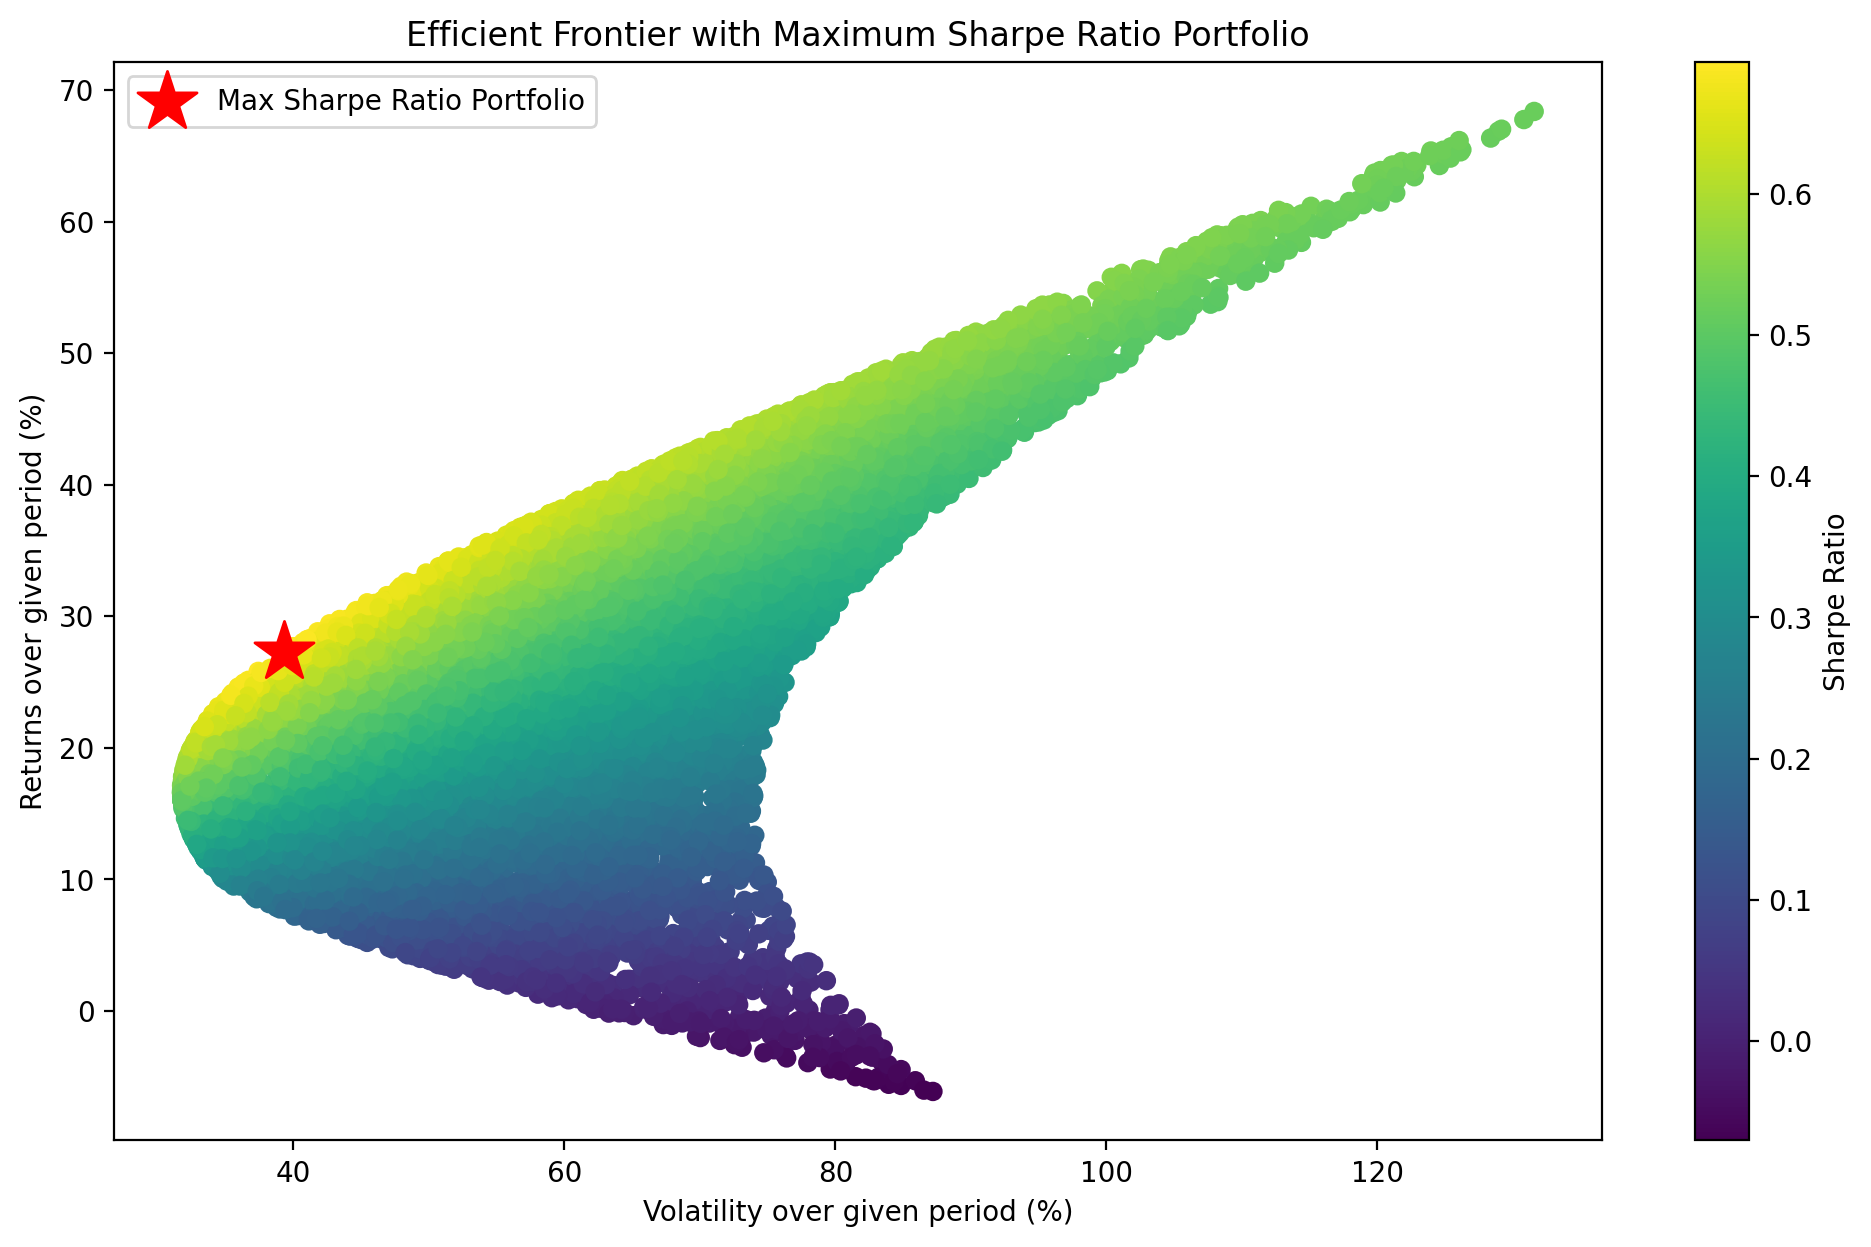

Volatility for optimized portfolio = 39.34 %
Returns for optimized portfolio for the optimized portfolio = 27.28 %
Preferrable asset allocation, in %:
BHP 76.3736
CBA 23.6264
TLS 0.0


In [13]:
plot_efficient_frontier(num_portfolios, meanReturns, covMatrix, risk_free_rate=0)

# Discussion

The computed Maximum Sharpe Ratio Portfolio yielded a value of approximately \-0.592. It's important to note that the negative sign aligns with the optimization goal of minimizing the negative Sharpe Ratio, equivalent to maximizing the positive Sharpe Ratio. The corresponding weight distribution provides insights into the optimal allocation of assets. In this case, the weights were distributed with roughly 76% in BHP, 24% in CBA, and 0% in TLS, giving valid advice based on historical performance and risk attributes of the selected stocks over the given time period. 

Comparing this with the Minimum Variance Portfolio, which aims to minimize portfolio variance, reveals a discernible trade\-off. The Maximum Sharpe Ratio Portfolio achieved a superior risk\-adjusted return, emphasizing its appeal for investors prioritizing both risk and return. Conversely, the Minimum Variance Portfolio attained lower risk at the expense of a slightly reduced Sharpe Ratio. The allocation for the weights with minimum volatility involved is roughly 85% in BHP, 7% in CBA, and 8% in TLS.

The Efficient Frontier graph provides a comprehensive view of risk\-return trade\-offs across portfolios. Integrating the Maximum Sharpe Ratio Portfolio denoted by red star onto the Efficient Frontier emphasizes its optimal positioning within the risk\-return continuum. 

The Efficient Frontier graph shows a parabolic trajectory, reflecting the interplay between risk and return. With only a few stocks in a portfolio, every stock significantly alters the risk and return dynamics, leading to a more pronounced parabolic shape. However, as the number of stocks in the portfolio increases, the impact of each additional asset on the portfolio's overall risk and return characteristics diminishes. The Efficient Frontier then transitions from a parabolic to a more circular shape. This circularization effect indicates the point where the benefits of the diversification approach its limit, making it hard to determine the optimal portfolio for the maximum Sharpe ratio, as the frontier becomes less distinct \[7\].

Portfolio optimization hinges on historical data inputted in the algorithm. During periods of Economic shifts, such as crises or booms, this Portfolio Optimization technique may not be accurate in providing investment advice, because such events exert significant influence on asset performance, potentially disrupting established relationships captured in historical returns and covariance matrices. The investigation period should be long enough to capture several economic cycles to produce results based on the algorithm implemented in this study. 

Each part of the code, from data retrieval to portfolio optimization, is designed for effective and streamlined analysis, while being commented on every step of the process to ensure readability and  the reproducibility purposes.

Future research should explore the impact of adjusting the risk\-free rate in portfolio optimization. The risk\-free rate, often assumed constant, can vary across different geographical locations due to the availability of diverse bonds and risk\-free options. Incorporating location\-specific risk\-free rates can improve the accuracy of portfolio optimization outcomes, providing a more realistic assessment of portfolio performance in different financial circumstances. 



# Conclusion

In conclusion, this study looked at the process of portfolio optimization by extracting financial data, Monte Carlo simulations, and mathematical techniques like using the Cholesky matrix and finding function's minimums. The Efficient Frontier analysis highlighted the trade\-off between risk and return and offered the optimal asset allocations that maximize the Sharpe Ratio and minimize portfolio variance for the given set of stocks. The results showed how prices of selected stocks are related, by analyzing their returns, covariances, and correlations.

The reliance on historical data, the normal distribution assumption for stock returns, and a 0 risk\-free rate underscore the study's limitations. Future research could adapt risk\-free rates to specific geographical locations for a more nuanced understanding. It could also improve the accuracy of predicting portfolios for stock portfolios with over 5 stocks, where the Efficient Frontier loses its distinct shape, and it becomes harder to find the optimal portfolio.

In essence, while the current study provides a good foundation for portfolio optimization, ongoing advancements and refinements are necessary to enhance the model's relevancy in dynamic financial landscapes. The exploration of additional factors and the improvement of assumptions will contribute to  more accurate and adaptable portfolio optimization model.



# References

\[1\] YFinance Library: The definitive guide! \(n.d.\). Retrieved December 12, 2023, from [https://www.qmr.ai/yfinance\-library\-the\-definitive\-guide/](https://www.qmr.ai/yfinance-library-the-definitive-guide/) 

\[2\] Simulated stock Portolio. Retrieved December 10, 2023, from [https://quantpy.com.au/python\-for\-finance/simulated\-stock\-portolio/](https://quantpy.com.au/python-for-finance/simulated-stock-portolio/) 

\[3\] Fernando, J. \(2023, October 25\). Sharpe Ratio: Definition, Formula, and examples. Investopedia. https://www.investopedia.com/terms/s/sharperatio.asp 

\[4\] Portfolio Optimisation.  Retrieved December 10, 2023, from [https://quantpy.com.au/python\-for\-finance/portfolio\-optimisation/](https://quantpy.com.au/python-for-finance/portfolio-optimisation/) 

\[5\] St, S. W. \(2023, October 11\). Declining stock and decent financials: Is the market wrong about Telstra Group Limited \(ASX:TLS\)? Simply Wall St News. [https://simplywall.st/stocks/au/telecom/asx\-tls/telstra\-group\-shares/news/declining\-stock\-and\-decent\-financials\-is\-the\-market\-wrong\-ab\-853](https://simplywall.st/stocks/au/telecom/asx-tls/telstra-group-shares/news/declining-stock-and-decent-financials-is-the-market-wrong-ab-853) 

\[6\]  Behera, A. \(2023, November 4\). Portfolio Optimisation using Monte Carlo Simulation. Medium. [https://medium.com/@beingamanforever/portfolio\-optimisation\-using\-monte\-carlo\-simulation\-25d88003782e\#:~:text=It generates a random portfolio,of the total portfolio value](https://medium.com/@beingamanforever/portfolio-optimisation-using-monte-carlo-simulation-25d88003782e#:~:text=It%20generates%20a%20random%20portfolio,of%20the%20total%20portfolio%20value). 

\[7\] Ganti, A. \(2023, June 28\). Efficient Frontier: What it is and how investors use it. Investopedia. https://www.investopedia.com/terms/e/efficientfrontier.asp 

